# Discussion Related with outliers And Impact On Machine Learning

# Which Machine learning Models are Sensitive to outliers?
1.Naivye Bayes Classifier ------- Not Sensitive Outliers
2.SVM---------------------------- Not Sensitive Outliers
3.Linear Regression-------------- Sensitive
4.Logistic Regression------------ Sensitive
5.Decision Tree, Regressor or Classifier----Not Sensitive
6.Ensemble(RF, XGboost, GB)-----------------Not Sensitive
7.KNN---------------------------------------Not Sensitive
8.KMeans------------------------------------Sensitive
9.Hierarchical------------------------------Sensitive
10.PCA--------------------------------------Sensitive
11.Neural Networks--------------------------Sensitive

Note- For sensitive or not senstive you have to know about math behind algorithm
      All the Unsupervised Algo are impacted,they are sensitive to outlier.

In [1]:
import pandas as pd
df= pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df['Age'].isnull().sum()

177

In [3]:
import seaborn as sns

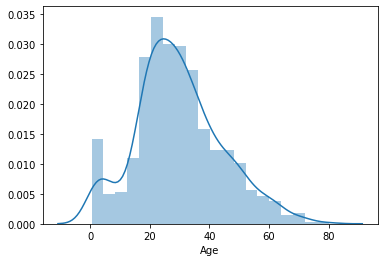

In [7]:
sns.distplot(df['Age'].dropna())

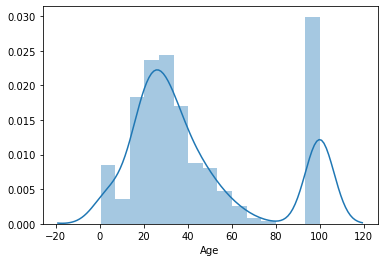

In [8]:
sns.distplot(df['Age'].fillna(100))

In [10]:
### Guassion Distribution

Text(0, 0.5, 'No Of Passenger')

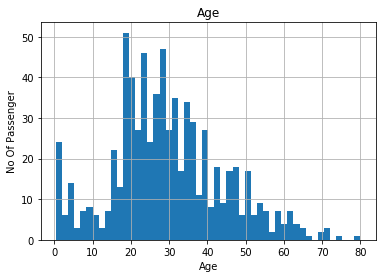

In [9]:
fig = df.Age.hist(bins=50)
fig.set_title('Age')
fig.set_xlabel('Age')
fig.set_ylabel('No Of Passenger')

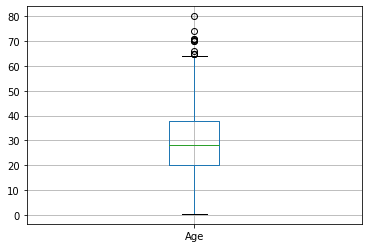

In [11]:
figure=df.boxplot(column='Age')

In [12]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [13]:
### Assumin Age follows a guassian Distribution we will calcuate the boundaries which differentitates the outliers

In [14]:
df['Age'].mean()

29.69911764705882

In [16]:
upper_boundry=df['Age'].mean()+ 3*df['Age'].std()
lower_boundry=df['Age'].mean()- 3*df['Age'].std()
print(lower_boundry), print(upper_boundry), print(df['Age'].mean())

-13.88037434994331
73.27860964406095
29.69911764705882


(None, None, None)

Upto Above only we have to do for Normalization Distribution , those outlier which are greater than and less than 
upper_boundry and lower_boundry respectively are outlier. 

# Below are done for which are Left or Right skewed. 

In [17]:
###Lets compute the Interquatile range to calculate the boundaries
IQR=df.Age.quantile(.75)-df.Age.quantile(.25)

In [18]:
IQR

17.875

In [20]:
lower_bridge=df['Age'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Age'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-6.6875
64.8125


(None, None)

In [21]:
### Extreme Outlier

In [22]:
lower_bridge=df['Age'].quantile(0.25)-(IQR*3)
upper_bridge=df['Age'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-33.5
91.625


(None, None)

### Feature is Skewed

Text(0, 0.5, 'No Of Passenger')

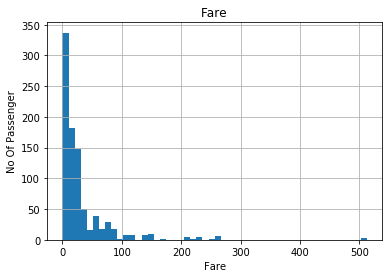

In [23]:
fig = df.Fare.hist(bins=50)
fig.set_title('Fare')
fig.set_xlabel('Fare')
fig.set_ylabel('No Of Passenger')

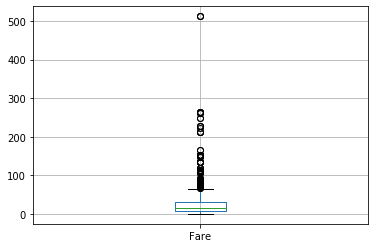

In [25]:
figure = df.boxplot(column='Fare')

In [26]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [31]:
###Lets compute the Interquatile range to calculate the boundaries
IQR=df.Fare.quantile(.75)-df.Fare.quantile(.25)

In [32]:
lower_bridge=df['Fare'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-26.724
65.6344


(None, None)

In [33]:
lower_bridge=df['Fare'].quantile(0.25)-(IQR*3)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-61.358399999999996
100.2688


(None, None)

# Now how to remove Outlier fro Age anf Fare Column

In [77]:
data=df.copy()

In [78]:
data.loc[data['Age']>=73, 'Age']=73

In [79]:
data.loc[data['Fare']>=100, 'Fare']=100

In [80]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Text(0, 0.5, 'No Of Passenger')

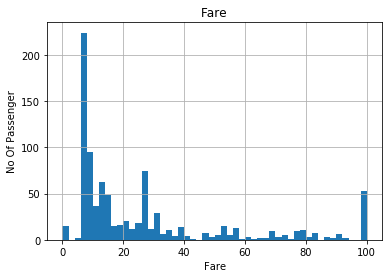

In [81]:
fig = data.Fare.hist(bins=50)
fig.set_title('Fare')
fig.set_xlabel('Fare')
fig.set_ylabel('No Of Passenger')

Text(0, 0.5, 'No Of Passenger')

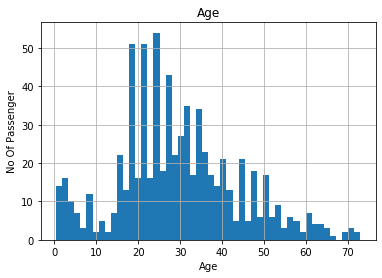

In [82]:
fig = data.Age.hist(bins=50)
fig.set_title('Age')
fig.set_xlabel('Age')
fig.set_ylabel('No Of Passenger')

In [83]:
### Now We Proceed with Machine Learning Algo

In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=0.3)

In [85]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score, roc_auc_score
print('Accuracy_score: {}'.format(accuracy_score(y_test,y_pred)))
print('roc_auc_score: {}'.format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.6753731343283582
roc_auc_score: 0.6845077998924153


In [86]:
## RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score, roc_auc_score
print('Accuracy_score: {}'.format(accuracy_score(y_test,y_pred)))
print('roc_auc_score: {}'.format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.6791044776119403
roc_auc_score: 0.6980455441993904
